### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [45]:
# Percentage of missing values
missing_percent = data.isnull().mean().sort_values(ascending = False)
missing_report = pd.DataFrame({
    'Missing Rate': missing_percent
}).head(20)

print(missing_report)


                      Missing Rate
car                       0.991485
CoffeeHouse               0.017108
Restaurant20To50          0.014901
CarryAway                 0.011905
RestaurantLessThan20      0.010249
Bar                       0.008436
destination               0.000000
passanger                 0.000000
direction_opp             0.000000
direction_same            0.000000
toCoupon_GEQ25min         0.000000
toCoupon_GEQ15min         0.000000
toCoupon_GEQ5min          0.000000
income                    0.000000
occupation                0.000000
education                 0.000000
has_children              0.000000
maritalStatus             0.000000
age                       0.000000
gender                    0.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [46]:
# Drop the car column
df = data.drop(columns=["car"])

# Impute low-level missingness in behavioral frequency columns
for col in ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df[col] = df[col].fillna("Unknown")


4. What proportion of the total observations chose to accept the coupon?



In [47]:
# Y = 1
acceptance_rate = df["Y"].mean()

print(acceptance_rate)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

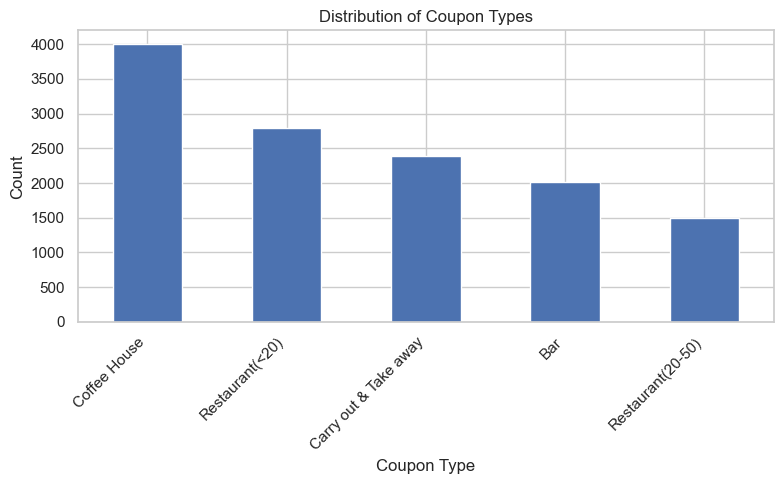

In [48]:
# Count the number of each coupon type
coupon_counts = df["coupon"].value_counts()

# Create bar plot
coupon_counts.plot(kind = "bar", figsize=(8, 5))

# Add labels and title
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

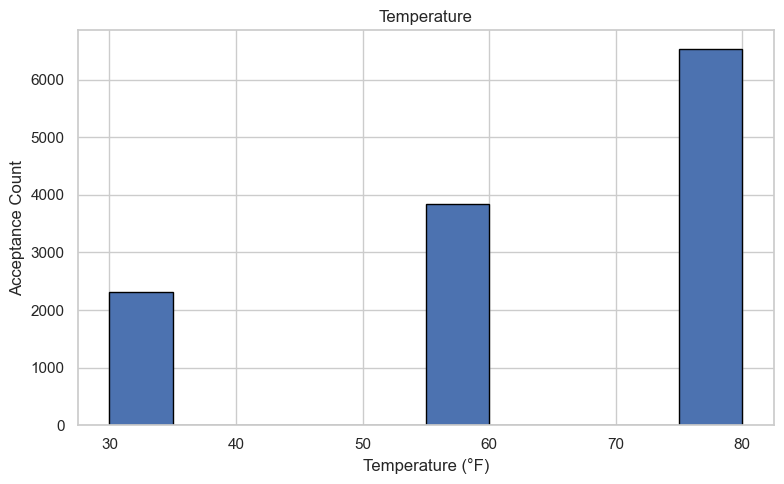

In [49]:
# Create a histogram of the temperature column
df["temperature"].plot(kind="hist", bins=10, edgecolor="black", figsize=(8, 5))

# Add labels and title
plt.title("Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Acceptance Count")

# Display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [50]:
# Create a new df containing
bar_coupons = df[df["coupon"] == "Bar"]

print(bar_coupons.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never   Unknown   
13  Female  21  Unmarried partner  ...        never   Unknown   
17  Female  21  Unmarried partner  ...        never   Unknown   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [51]:
bar_acceptance_rate = bar_coupons["Y"].mean()

print(bar_acceptance_rate)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [55]:
# Define two groups based on bar frequency
few_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["never", "less1", "1~3"])]
frequent_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["4~8", "gt8"])]

# Calculate acceptance rates
few_accept_rate = few_bar_visits["Y"].mean()
freq_accept_rate = frequent_bar_visits["Y"].mean()

# Display results
print(f"Acceptance rate (≤3 times/month): {few_accept_rate:.2%}")
print(f"Acceptance rate (>3 times/month): {freq_accept_rate:.2%}")

Acceptance rate (≤3 times/month): 37.06%
Acceptance rate (>3 times/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
# Define drivers who go to a bar more than once a month AND are over 25
group1 = bar_coupons[
    (bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (~bar_coupons["age"].isin(["below21", "21", "21-25"]))
]

# Define all other drivers
group2 = bar_coupons[~bar_coupons.index.isin(group1.index)]

# Calculate acceptance rates
group1_accept_rate = group1["Y"].mean()
group2_accept_rate = group2["Y"].mean()

# Display the results
print(f"Acceptance rate (Bar >1/month & Age >25): {group1_accept_rate:.2%}")
print(f"Acceptance rate (All others): {group2_accept_rate:.2%}")

Acceptance rate (Bar >1/month & Age >25): 69.52%
Acceptance rate (All others): 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [57]:
# Define the target group:
# - Bar visits more than once a month
# - Passengers not kids
# - Occupation not in ['Farming, Fishing, or Forestry']
group1 = bar_coupons[
    (bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_coupons["passanger"] != "Kid(s)") &
    (bar_coupons["occupation"] != "Farming, Fishing & Forestry")
]

# Define all others
group2 = bar_coupons[~bar_coupons.index.isin(group1.index)]

# Calculate acceptance rates
group1_accept_rate = group1["Y"].mean()
group2_accept_rate = group2["Y"].mean()

# Display the results
print(f"Acceptance rate (Bar >1/month, not with kids, not farming/fishing/forestry): {group1_accept_rate:.2%}")
print(f"Acceptance rate (All others): {group2_accept_rate:.2%}")

Acceptance rate (Bar >1/month, not with kids, not farming/fishing/forestry): 71.32%
Acceptance rate (All others): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [58]:
# Condition 1: Go to bars >1/month, no kid passengers, not widowed
cond1 = (
    df["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (df["passanger"] != "Kid(s)") &
    (df["maritalStatus"] != "Widowed")
)

# Condition 2: Go to bars >1/month and age < 30
cond2 = (
    df["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (df["age"].isin(["below21", "21", "21-25", "26-30"]))
)

# Condition 3: Go to cheap restaurants >4 times/month and income < 50K
cond3 = (
    df["RestaurantLessThan20"].isin(["4~8", "gt8"]) &
    df["income"].isin([
        "Less than $12500",
        "$12500 - $24999",
        "$25000 - $37499",
        "$37500 - $49999"
    ])
)

# Combine all three conditions
target_group = df[cond1 | cond2 | cond3]

# Define all others
others = df[~df.index.isin(target_group.index)]

# Calculate acceptance rates
target_accept_rate = target_group["Y"].mean()
others_accept_rate = others["Y"].mean()

# Display results
print(f"Acceptance rate (target group): {target_accept_rate:.2%}")
print(f"Acceptance rate (all others): {others_accept_rate:.2%}")

Acceptance rate (target group): 60.47%
Acceptance rate (all others): 54.38%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
# Drivers who accept bar coupons:
# * Go to bars regularly (more than once a month).
# * Are not traveling with kids.
# * Tend to be younger (under 30) or middle-aged (25–40).
# * Possibly preferring inexpensive dining.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [59]:
# Analyze "Coffee House" Coupon
df = pd.read_csv("data/coupons.csv")
coffee_house_coupons = df[df["coupon"] == "Coffee House"]

coffee_house_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [60]:
# Acceptance rate by passenger type
accept_by_pass = coffee_house_coupons.groupby("passanger")["Y"].mean().sort_values(ascending = False)

print("Overall acceptance rate:", coffee_house_coupons["Y"].mean())
print("\nAcceptance rate by passenger:")
print(accept_by_pass.round(3))

Overall acceptance rate: 0.49924924924924924

Acceptance rate by passenger:
passanger
Friend(s)    0.597
Partner      0.570
Kid(s)       0.483
Alone        0.438
Name: Y, dtype: float64


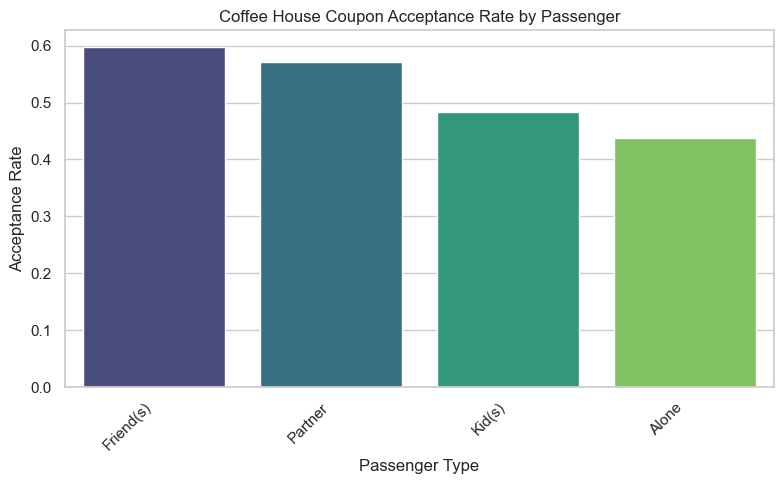

In [61]:
# Barplot with seaborn
accept_by_pass_df = accept_by_pass.reset_index()
accept_by_pass_df.columns = ["passanger", "acceptance_rate"]

plt.figure(figsize=(8,5))
sns.barplot(
    data=accept_by_pass_df,
    x="passanger",
    y="acceptance_rate",
    hue="passanger",     
    palette="viridis",
    legend=False,
    order=accept_by_pass_df["passanger"]
)
plt.title("Coffee House Coupon Acceptance Rate by Passenger")
plt.xlabel("Passenger Type")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [65]:
# Acceptance rate by age
younger_group = coffee_house_coupons[coffee_house_coupons["age"].isin(["below21", "21", "26"])]
mid_aged_group = coffee_house_coupons[coffee_house_coupons["age"].isin(["31", "36", "41", "46"])]
older_group = coffee_house_coupons[coffee_house_coupons["age"].isin(["50plus"])]

# Calculate acceptance rates
younger_group_rate = younger_group["Y"].mean()
mid_aged_rate = mid_aged_group["Y"].mean()
older_rate = older_group["Y"].mean()

# Display results
print(f"Acceptance rate (under 30): {younger_group_rate:.2%}")
print(f"Acceptance rate (31-50): {mid_aged_rate:.2%}")
print(f"Acceptance rate (over 50): {older_rate:.2%}")


Acceptance rate (under 30): 53.43%
Acceptance rate (31-50): 48.47%
Acceptance rate (over 50): 42.02%


In [66]:
# Acceptance rate by weather
accept_by_weather = coffee_house_coupons.groupby("weather", as_index=False)["Y"].mean().sort_values("Y", ascending=False)
print("Acceptance rate by weather:")
print(accept_by_weather.round(3))

Acceptance rate by weather:
  weather      Y
0   Rainy  0.522
2   Sunny  0.504
1   Snowy  0.432


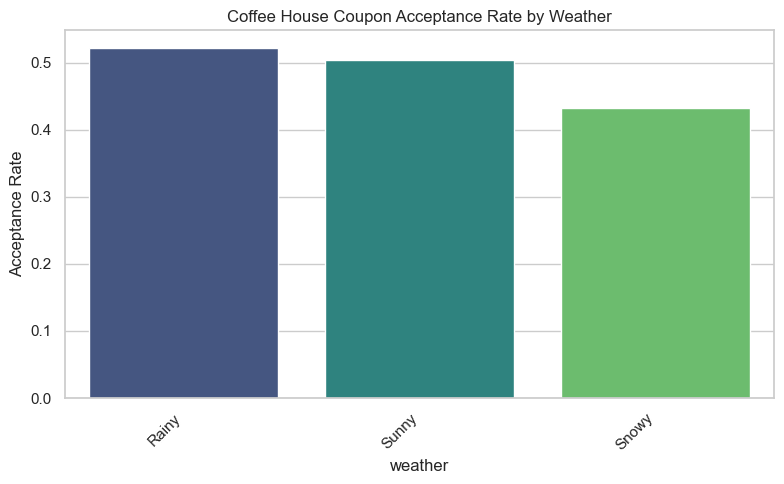

In [67]:
# Barplot with Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(
    data=accept_by_weather,
    x="weather",
    y="Y",
    hue="weather",       
    palette="viridis",
    legend=False
)

# Labels and title
plt.title("Coffee House Coupon Acceptance Rate by Weather")
plt.xlabel("weather")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [68]:
# Acceptance rate by age and passanger
ax_age = (
    coffee_house_coupons.pivot_table(index="passanger", columns="age", values="Y", aggfunc="mean")
    .reindex(index=accept_by_pass.index)  # order passengers by overall acceptance
)
print("\nAcceptance by Passenger x Age:")
print(ax_age.round(3))


Acceptance by Passenger x Age:
age           21     26     31     36     41     46  50plus  below21
passanger                                                           
Friend(s)  0.609  0.640  0.585  0.577  0.615  0.571   0.471    0.854
Partner    0.543  0.556  0.636  0.581  0.667  0.846   0.417    0.600
Kid(s)     0.842  0.536  0.373  0.441  0.379  0.625   0.467      NaN
Alone      0.460  0.435  0.420  0.408  0.441  0.421   0.388    0.646


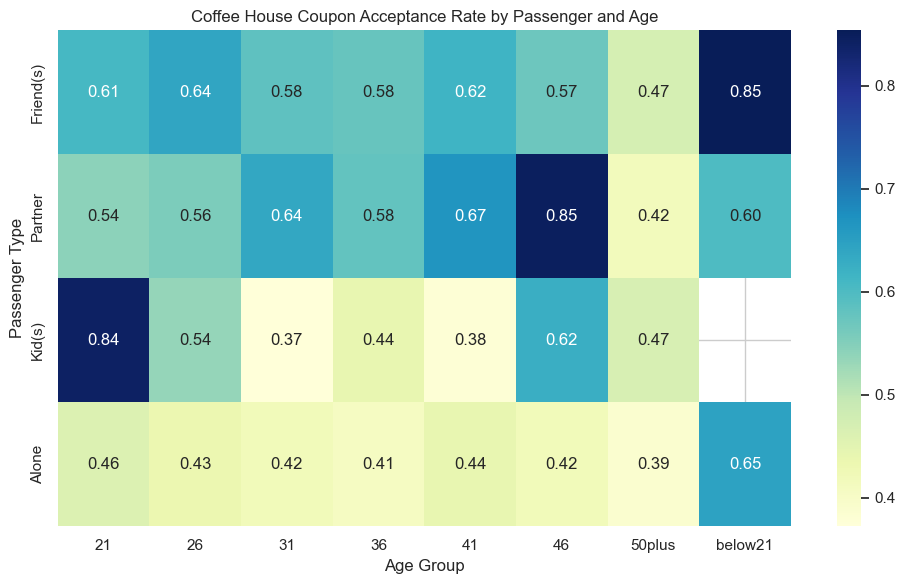

In [69]:
# Heatmap with seaborn
plt.figure(figsize=(10,6))
sns.heatmap(ax_age, annot=True, cmap="YlGnBu", fmt=".2f")

# Add titles and labels
plt.title("Coffee House Coupon Acceptance Rate by Passenger and Age")
plt.xlabel("Age Group")
plt.ylabel("Passenger Type")
plt.tight_layout()
plt.show()

In [ ]:
# Drivers who accept coffee house coupons:
# * Traveling with friends or a partner.
# * Tend to be younger or mid-aged.
# * In sunny or rainy day.
# * Young people with friends or mid-aged people with partner.


In [ ]:
# Recommendations
# Bar Coupons: Target frequent bar visitors over 25 years old who drive without kids.
# Coffee House Coupons: Target younger or social passengers (friends, partners) especially during good weather.